# Interpolation
__Author:__ Mahdi Firouz

__Course:__ Numerical Analysis

In [45]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import sympy as sym
from sympy import *

### First Question
find a polynomial interpolation function for f(x) = cos(x)

<center>

| X | 0.2 | 0.4 | 0.6 | 0.8 |
| :---: | :---: | :---: | :---: | :---: |
| Y | ? | ? | ? | ? |

</center>

For polynomial interpolation function you should consider: $p(x) = a + bx + cx2 + dx3$

You should solve 4 equations with 4 variables to obtain unknown variables. You should plot f(x), p(x) and E(x) which presents interpolation error through interval x ∈ [0, 1].


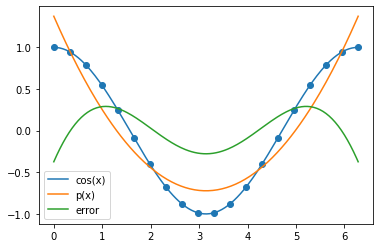

+---+-------------------+--------------------+--------------------+--------------------+
| X |        0.2        |        0.4         |        0.6         |        0.8         |
+---+-------------------+--------------------+--------------------+--------------------+
| Y | 1.115250958805197 | 0.8739010202304927 | 0.6495380300327703 | 0.4421619882120297 |
+---+-------------------+--------------------+--------------------+--------------------+


In [38]:
f = np.cos

# Define the interval to interpolate over
x = np.linspace(0, 2*np.pi, 20)
y = f(x)

# Find the coefficients of the polynomial
coeffs = np.polyfit(x, y, 3)

# Define the polynomial function
p = np.poly1d(coeffs)

x_vals = np.linspace(0, 2*np.pi, 200)
y_vals = p(x_vals)

plt.plot(x_vals, f(x_vals), label='cos(x)')
plt.plot(x_vals, y_vals, label='p(x)')
plt.plot(x_vals, f(x_vals) - y_vals, label="error")
plt.scatter(x, y)
plt.legend()
plt.show()

# obtain unknown variables
vars = [0.2, 0.4, 0.6, 0.8]
table = PrettyTable()
table.field_names = ["X", "0.2", "0.4", "0.6", "0.8"]
table_row = [p(x) for x in vars]
table_row.insert(0, "Y")
table.add_row(table_row)
print(table)


### Second Question (Hermite Interpolation):
Find a polynomial interpolation function for $f(x) = cos(2x)$ which interpolates $f'(x)$ in addition to $f(x)$

<center>

| X | 0.2 | 0.4 | 0.6 | 0.8 |
| :---: | :---: | :---: | :---: | :---: |
| f | ? | ? | ? | ? |
| f' | ? | ? | ? | ? |

</center>

In the end of this task, your suggested interplation function should satisfy two conditions:

\begin{cases}
  p(x_i) = f(x_i) \\
  p'(x_i) = f'(x_i)
\end{cases}

Two plots will be mandatory for this task. First plot contains $f(x), p(x)$ and $E(x)$ which presents
interpolation error through interval x ∈ [0, 1]. Second plot contains $f′(x), p′(x)$ and $E′(x)$ which

presents first order derivation interpolation error through interval $x ∈ [0, 1]$.

In [51]:
x = sym.Symbol('x')
f = cos(2*x)
f_derivative =  Derivative(f)

a0 = sym.Symbol('a0')
a1 = sym.Symbol('a1')
a2 = sym.Symbol('a2')
a3 = sym.Symbol('a3')
a4 = sym.Symbol('a4')
a5 = sym.Symbol('a5')
a6 = sym.Symbol('a6')
a7 = sym.Symbol('a7')

p = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6 + a7*x**7
p_derivative = p.diff(x)

Xs = [0.2,0.4,0.6,0.8]

A = []
B = []

for i in Xs:
    B.append(float(f.subs(x,i).evalf()))

for i in Xs:
    B.append(float(f_derivative.subs(x,i).evalf()))

for i in Xs:
    temp = []
    for j in [a0,a1,a2,a3,a4,a5,a6,a7]:
        temp.append(float(p.subs(x,i).coeff(j)))
    A.append(temp)

for i in Xs:
    temp = []
    for j in [a0,a1,a2,a3,a4,a5,a6,a7]:
        temp.append(float(p_derivative.subs(x,i).coeff(j)))
    A.append(temp)

A

[[1.0,
  0.2,
  0.04000000000000001,
  0.008000000000000002,
  0.0016000000000000003,
  0.0003200000000000001,
  6.400000000000002e-05,
  1.2800000000000005e-05],
 [1.0,
  0.4,
  0.16000000000000003,
  0.06400000000000002,
  0.025600000000000005,
  0.010240000000000003,
  0.0040960000000000015,
  0.0016384000000000006],
 [1.0,
  0.6,
  0.36,
  0.21599999999999997,
  0.1296,
  0.07775999999999998,
  0.04665599999999999,
  0.027993599999999993],
 [1.0,
  0.8,
  0.6400000000000001,
  0.5120000000000001,
  0.4096000000000001,
  0.3276800000000001,
  0.2621440000000001,
  0.20971520000000007],
 [0.0,
  1.0,
  0.4,
  0.12000000000000002,
  0.03200000000000001,
  0.008000000000000002,
  0.0019200000000000005,
  0.00044800000000000016],
 [0.0,
  1.0,
  0.8,
  0.4800000000000001,
  0.25600000000000006,
  0.12800000000000003,
  0.061440000000000015,
  0.02867200000000001],
 [0.0,
  1.0,
  1.2,
  1.08,
  0.8639999999999999,
  0.6479999999999999,
  0.46655999999999986,
  0.32659199999999994],
 [0.

In [52]:
y = np.linalg.solve(np.array(A),np.array(B))

y

array([ 9.99994181e-01,  1.22708031e-04, -2.00108611e+00,  5.28671621e-03,
        6.51100058e-01,  2.86127038e-02, -1.21315643e-01,  2.11344532e-02])

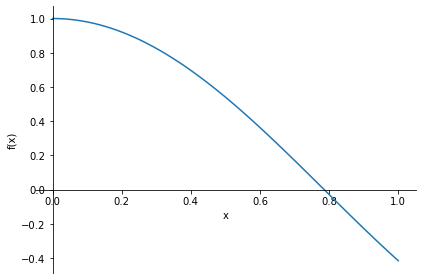

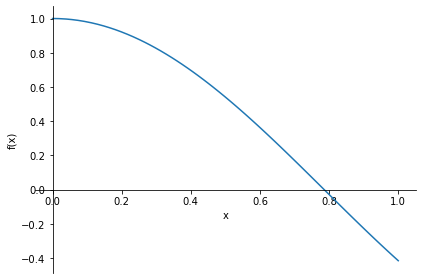

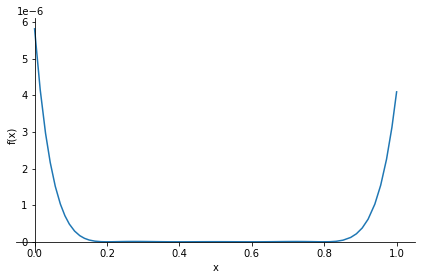

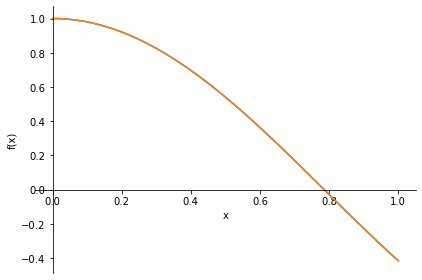

In [53]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(y[0]+y[1]*x+y[2]*x*x+y[3]*x**3+y[4]*x**4+y[5]*x**5+y[6]*x**6+y[7]*x**7,(x, 0, 1), show=True)
p2 = plot(cos(2*x),(x,0, 1), show=True)
p3 = plot(cos(2*x)-(y[0]+y[1]*x+y[2]*x*x+y[3]*x**3+y[4]*x**4+y[5]*x**5+y[6]*x**6+y[7]*x**7),(x,0, 1), show=True)
p1.append(p2[0])
p1.show()


### Third Question:
Consider $p(x) = a_0 + a_1x + · · · + a_6x^6$ as an interpolation function for a given function:

<center>

| X | 2 | 4 | 5 |
| :---: | :---: | :---: | :---: |
| y | 12 | 18 | 13 |
| y' | 0 | 1 | 0 |
| y" | -0.7 | -0.7 | -0.7 |

</center>

Form equations, determine matrix shape, solve equation system and obtain unknown variables and plot function

In [54]:
x = sym.Symbol('x')

a0 = sym.Symbol('a0')
a1 = sym.Symbol('a1')
a2 = sym.Symbol('a2')
a3 = sym.Symbol('a3')
a4 = sym.Symbol('a4')
a5 = sym.Symbol('a5')
a6 = sym.Symbol('a6')


p = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6 
p_derivative = p.diff(x)
p_doubleDerivative = p_derivative.diff(x)

points = [2,4,5]
B = [12,18,13,0,1,0,-0.7,-0.7,-0.7]
p

a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6

In [55]:
p_derivative

a1 + 2*a2*x + 3*a3*x**2 + 4*a4*x**3 + 5*a5*x**4 + 6*a6*x**5

In [56]:
p_doubleDerivative

2*a2 + 6*a3*x + 12*a4*x**2 + 20*a5*x**3 + 30*a6*x**4

In [57]:
A = []
for i in points:
    temp = []
    for j in [a0,a1,a2,a3,a4,a5,a6]:
        temp.append(float(p.subs(x,i).coeff(j)))
    A.append(temp)

for i in points:
    temp = []
    for j in [a0,a1,a2,a3,a4,a5,a6]:
        temp.append(float(p_derivative.subs(x,i).coeff(j)))
    A.append(temp)

for i in points:
    temp = []
    for j in [a0,a1,a2,a3,a4,a5,a6]:
        temp.append(float(p_doubleDerivative.subs(x,i).coeff(j)))
    A.append(temp)
A

[[1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0],
 [1.0, 4.0, 16.0, 64.0, 256.0, 1024.0, 4096.0],
 [1.0, 5.0, 25.0, 125.0, 625.0, 3125.0, 15625.0],
 [0.0, 1.0, 4.0, 12.0, 32.0, 80.0, 192.0],
 [0.0, 1.0, 8.0, 48.0, 256.0, 1280.0, 6144.0],
 [0.0, 1.0, 10.0, 75.0, 500.0, 3125.0, 18750.0],
 [0.0, 0.0, 2.0, 12.0, 48.0, 160.0, 480.0],
 [0.0, 0.0, 2.0, 24.0, 192.0, 1280.0, 7680.0],
 [0.0, 0.0, 2.0, 30.0, 300.0, 2500.0, 18750.0]]

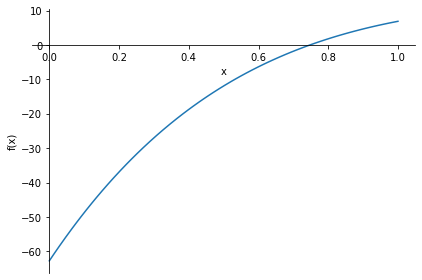

In [59]:
y = np.linalg.lstsq(A, B, rcond=None)[0]

from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(y[0]+y[1]*x+y[2]*x*x+y[3]*x**3+y[4]*x**4+y[5]*x**5+y[6]*x**6,(x, 0, 1), show=True)
